Import Libraries that will likely be used

In [1]:
import pandas as pd
import numpy as np
import spotipy as sp
import os

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Take a look at first file to see what cleaning needs to be done

In [2]:
pd_BI = pd.read_csv('../spotify_artist_data/BI.csv')
pd_BI.head()

,id,followers,genres,name,popularity,year
0,1nIUhcKHnK6iyumRyoV68C,765940,"['classic soundtrack', 'italian soundtrack', '...",Ennio Morricone,70,1922
1,2aAHdB5HweT3mFcRzm0swc,369680,"['adult standards', 'big band', 'easy listenin...",Glenn Miller,60,1922
2,5MpELOfAiq7aIBTij30phD,58395,"['adult standards', 'big band', 'jazz trumpet'...",Harry James,58,1922
3,5o8E07TcYqIefZpDejymAd,14205,"['big band', 'swing', 'vocal harmony group']",The Pied Pipers,51,1922
4,0DYWCXTkNqGFZIf67SrWEa,95006,"['adult standards', 'dixieland', 'harlem renai...",Fats Waller,49,1922


Let's check whether there are duplicates.
<br>
Popularity feature is the important one in later analysis, so let's sort on that

In [3]:
# Let's check for duplicates by sorting
pd_BI = pd_BI.sort_values('popularity', ascending=False)
pd_BI.head()

,id,followers,genres,name,popularity,year
73127,1uNFoZAHBGtllmzznpCI3s,44573007,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,2011
72127,1uNFoZAHBGtllmzznpCI3s,44573007,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,2010
74127,1uNFoZAHBGtllmzznpCI3s,44573007,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,2012
75127,1uNFoZAHBGtllmzznpCI3s,44573007,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,2013
77127,1uNFoZAHBGtllmzznpCI3s,44573007,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,2015


The 'year' column can be dropped so that we get true duplicates of entries
<br>All of the features are the same, as they are based on the id feature

In [4]:
pd_BI.drop(columns=['year'], inplace=True)
pd_BI.drop_duplicates(subset= "name", keep= 'first', inplace= True)

pd_BI.head()

,id,followers,genres,name,popularity
73127,1uNFoZAHBGtllmzznpCI3s,44573007,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
69127,06HL4z0CvFAxyc27GXpf02,38839504,"['pop', 'post-teen pop']",Taylor Swift,98
75131,3Nrfpe0tUJi4K4DXYWgMUX,31593169,"['k-pop', 'k-pop boy group']",BTS,96
75129,1Xyo4u8uXC1ZmMpatF05PJ,31280933,"['canadian contemporary r&b', 'canadian pop', ...",The Weeknd,96
75132,66CXWjxzNUsdJxJ2JdwvnR,61248736,"['pop', 'post-teen pop']",Ariana Grande,95


Let's take a look at the distribution of artists at each popularity
<br>That way, we can decide if we should leave any out

In [5]:
print(f"We have {pd_BI.size} unique artists")

for n in range(0, 100, 10):
    tmp = pd_BI[pd_BI['popularity']>=n].size
    print(f"There are {tmp} artists with popularity above {n}")

We have 100495 unique artists
There are 100495 artists with popularity above 0
There are 59830 artists with popularity above 10
There are 53465 artists with popularity above 20
There are 47190 artists with popularity above 30
There are 39070 artists with popularity above 40
There are 29690 artists with popularity above 50
There are 19490 artists with popularity above 60
There are 6805 artists with popularity above 70
There are 1395 artists with popularity above 80
There are 130 artists with popularity above 90


Looks like about half of the artists have a popularity within {0, 9]
<br> Let's visualize with a histogram so we can take a look from another perspective

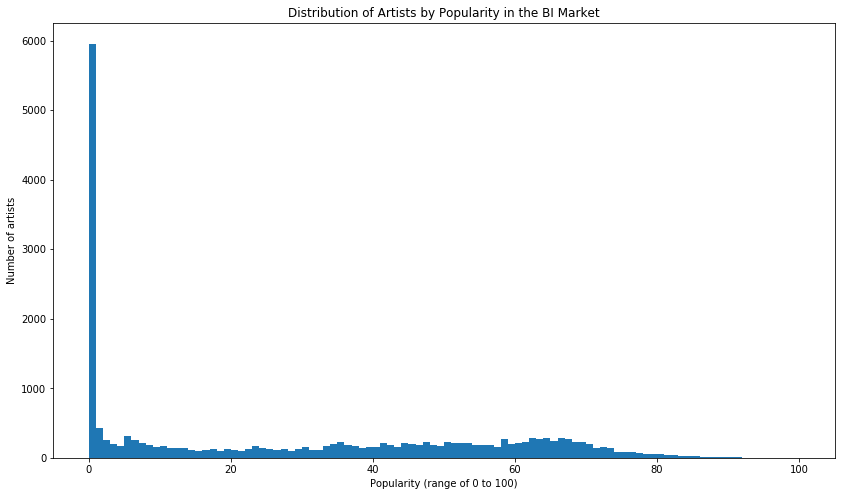

In [6]:
# Create a simple histogram
binsize = 1
bins = np.arange(0, pd_BI['popularity'].max()+binsize, binsize)
plt.figure(figsize=[14, 8])

plt.hist(data = pd_BI, x = 'popularity', bins = bins)
plt.title('Distribution of Artists by Popularity in the BI Market')
plt.xlabel('Popularity (range of 0 to 100)')
plt.ylabel('Number of artists')
plt.show()

Looks like about half the artists have popularity = 0
<br>We will keep this in mind, but will not filter them out here.
<br>We may want to use this information in future analyses.
<br>
<br>For now, we will create clean sets of data for each market.
<br>First, we will get all the filenames and market data as dataframes

In [7]:
# Walk through all files, storing file names
path, dirs, files = next(os.walk("../spotify_artist_data/"))

# List for holding all the market names
artist_market = []

# List for holding each file's data (as a dataframe)
artist_df_list = []

# for each file, remove duplicates 
#   and store the cleaned dataframe in a list
# DFs will be saved to new files, but in a different loop
#   so that the data can be further examined and cleaned
#   if necessary
for f in range(len(files)):
    temp_df = pd.read_csv("../spotify_artist_data/"+files[f],
                      index_col = None, header = 0)
    
#   drop the year column so that duplicates can be dropped
    temp_df.drop(columns=['year'], inplace=True)
    temp_df.drop_duplicates(subset= "name", keep= 'first', inplace=True)

#   add this df to the list
    artist_df_list.append(temp_df)

#   get the market name from the filename
    tmp_market = str(files[f])
#   store the market name
    artist_market.append(tmp_market)

Next, we store each dataframe as a .csv file in a new directory

In [8]:
'''
# Sanity Check
if(len(artist_df_list) == len(artist_market)):
    print("List lengths match")
else:
    print("List lengths do not match")
'''

# Store the cleaned data in a new file
#   Using the market name as the filename
for df in range(len(artist_df_list)):
    artist_df_list[df].to_csv("../artist_market_data/" + str(artist_market[df]), index=False)
#   for debugging
#    print(f"Wrote a df of size {artist_df_list[df].size} to file {artist_market[df]}")